In [1]:
from typing import List, Union, Tuple
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [219]:
features = 100
X, y = make_classification(n_samples=10000, n_features=features)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [220]:
class LogisticRegressor:
    def __init__(self, features):
        self.learning_rate = 0.001
        self.b = 0
        self.weights = np.zeros((1, features))
        self.losses = np.array([], dtype=float)
        self.threshold = 0.5
    
    def fit(self, X:List[List[float]], y:List[int]):
        self.X, self.y = X, y
        
        for epoch in range(800):
            for i in range(self.X.shape[0]):
                y = self.sigmoid_activation(np.dot(self.weights, self.X[i].T) + self.b)

                loss = self.calculate_loss(y, self.y[i])

                der_lw, der_lb = self.calculate_grads(self.X[i], y, self.y[i])
                
                self.weights = self.weights - self.learning_rate * der_lw
                self.b = self.b - self.learning_rate * der_lb
                
            self.losses = np.append(self.losses, loss)
            
    def sigmoid_activation(self, x: float) -> float:
        return 1/(1 + np.exp(-x))
    
    def calculate_loss(self, y: float, true_label: int) -> float:
        return ((-true_label * np.log(y)) - (1 - true_label) * np.log(1 - y))
        
    def calculate_grads(self, x:List[float], y: float, true_label: int) -> Tuple[List[float], float]:
        der_lw = x * (y - true_label)
        der_lb = (y - true_label) 
        
        return der_lw, der_lb
    
    def predict(self, x: List[List[float]]) -> List[int]:
        preds = np.array([], dtype=int)
        
        for i in range(x.shape[0]):
            pred = self.sigmoid_activation(np.dot(self.weights, x[i].T) + self.b)
            pred = 0 if (pred <= self.threshold).all() else 1
            preds = np.append(preds, pred)
        
        return preds

In [221]:
regressor = LogisticRegressor(features)
regressor.fit(X_train, y_train)

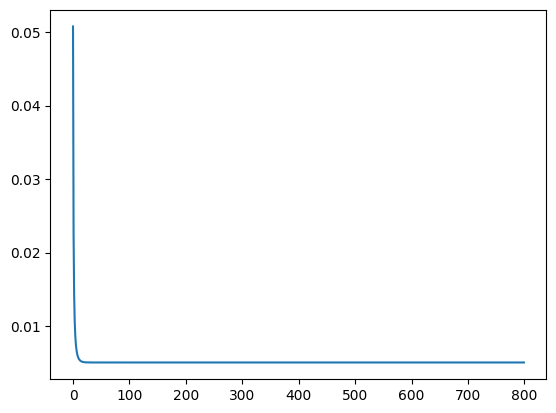

In [222]:
preds = regressor.predict(X_test)
plt.plot([i for i in range(regressor.losses.shape[0])], regressor.losses)

In [224]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds == clf.predict(X_test)

array([ True,  True,  True, ...,  True,  True,  True])